# Objectness Classification DataModule EDA

In [2]:
import matplotlib.pyplot as plt

from ego4d import Ego4DObjnessClsDataset
from datamodule import ObjnessClsDataModule

dataset_dir = "/Users/shionyamadate/Documents/datasets"

## Ego4D dataset

In [11]:
# Download data for training
Ego4DObjnessClsDataset(
    dataset_dir=dataset_dir,
    extract=True,
)
# Download data for validation
Ego4DObjnessClsDataset(
    dataset_dir=dataset_dir,
    phase='val',
    extract=True,
)

In [55]:
ego4d_dataset = ObjnessClsDataModule(
    dataset_dir=dataset_dir,
    batch_size=1,
    with_transform=False,
)
ego4d_dataset.setup()

ego4d_train_dataloader = iter(ego4d_dataset.train_dataloader())
# ego4d_val_dataloader = iter(ego4d_dataset.val_dataloader())

Preparing data: 100%|██████████| 12801/12801 [00:00<00:00, 158122.97it/s]


frames shape: torch.Size([1, 3, 224, 224, 3])
labels shape: torch.Size([1, 3, 3, 224, 224])


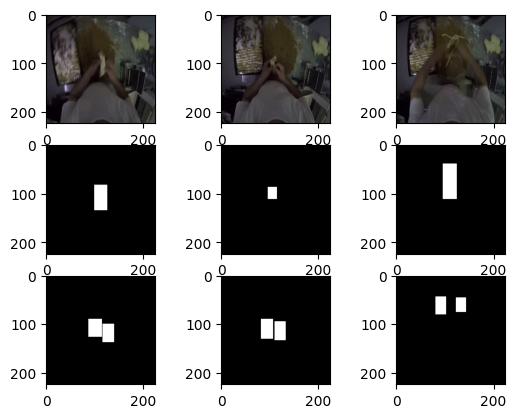

In [59]:
ego4d_frames, ego4d_labels = next(ego4d_train_dataloader)
print(f"frames shape: {ego4d_frames.shape}")
print(f"labels shape: {ego4d_labels.shape}")

pre_img = ego4d_frames[0][0]
pre_mask = ego4d_labels[0][0]

pnr_img = ego4d_frames[0][1]
pnr_mask = ego4d_labels[0][1]

post_img = ego4d_frames[0][2]
post_mask = ego4d_labels[0][2]

fig = plt.figure()

fig.add_subplot(3, 3, 1)
plt.imshow(pre_img)
fig.add_subplot(3, 3, 4)
plt.imshow(pre_mask[1])
plt.gray()
fig.add_subplot(3, 3, 7)
plt.imshow(pre_mask[2])
plt.gray()

fig.add_subplot(3, 3, 2)
plt.imshow(pnr_img)
fig.add_subplot(3, 3, 5)
plt.imshow(pnr_mask[1])
plt.gray()
fig.add_subplot(3, 3, 8)
plt.imshow(pnr_mask[2])
plt.gray()

fig.add_subplot(3, 3, 3)
plt.imshow(post_img)
fig.add_subplot(3, 3, 6)
plt.imshow(post_mask[1])
plt.gray()
fig.add_subplot(3, 3, 9)
plt.imshow(post_mask[2])
plt.gray()

plt.show()

plt.clf()
plt.close()

## EgoHOS dataset

In [60]:
dataset_dir = "/Users/shionyamadate/Documents/datasets"

egohos_dataset = ObjnessClsDataModule(
    dataset_dir=dataset_dir,
    dataset_mode='egohos',
    batch_size=1,
    with_transform=False,
)
egohos_dataset.setup()

egohos_train_dataloader = iter(egohos_dataset.train_dataloader())

frames shape: torch.Size([1, 224, 224, 3])
labels shape: torch.Size([1, 3, 224, 224])


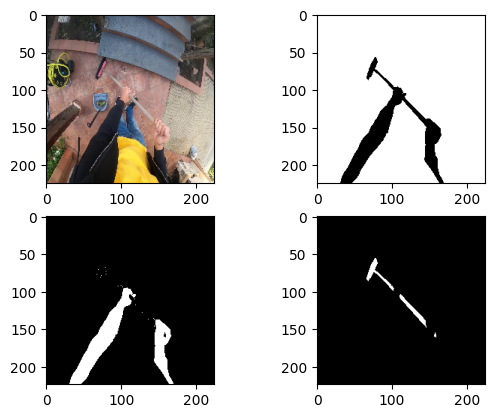

In [61]:
egohos_frames, egohos_labels = next(egohos_train_dataloader)
print(f"frames shape: {egohos_frames.shape}")
print(f"labels shape: {egohos_labels.shape}")

egohos_img = egohos_frames[0]
egohos_mask = egohos_labels[0]

fig = plt.figure()

fig.add_subplot(2, 2, 1)
plt.imshow(egohos_img)

fig.add_subplot(2, 2, 2)
plt.imshow(egohos_mask[0])
plt.gray()

fig.add_subplot(2, 2, 3)
plt.imshow(egohos_mask[1])
plt.gray()

fig.add_subplot(2, 2, 4)
plt.imshow(egohos_mask[2])
plt.gray()

plt.show()

plt.clf()
plt.close()

In [65]:
import os
import sys
import git
import torch

git_repo = git.Repo(os.getcwd(), search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(f"{git_root}/objectness_classification/models")

from unet import System

system = System()
model = system.model
print(model(torch.rand(1, 224, 224, 3)).shape)

torch.Size([1, 3, 224, 224])
